Carregando dados dos resultados...
  Carregado: Macro - Estratégia
  Carregado: Macro - Buy and Hold
  Carregado: Micro - Estratégia
  Carregado: Micro - Buy and Hold
  Carregado: MacroMicro - Estratégia
  Carregado: MacroMicro - Buy and Hold
  Carregado: Kfold - Estratégia
  Carregado: Kfold - Buy and Hold

Dados unidos com sucesso.
  Gerando gráfico para experimento: Kfold


C:\Users\leona\AppData\Local\Temp\ipykernel_28052\2651651332.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_strategies)


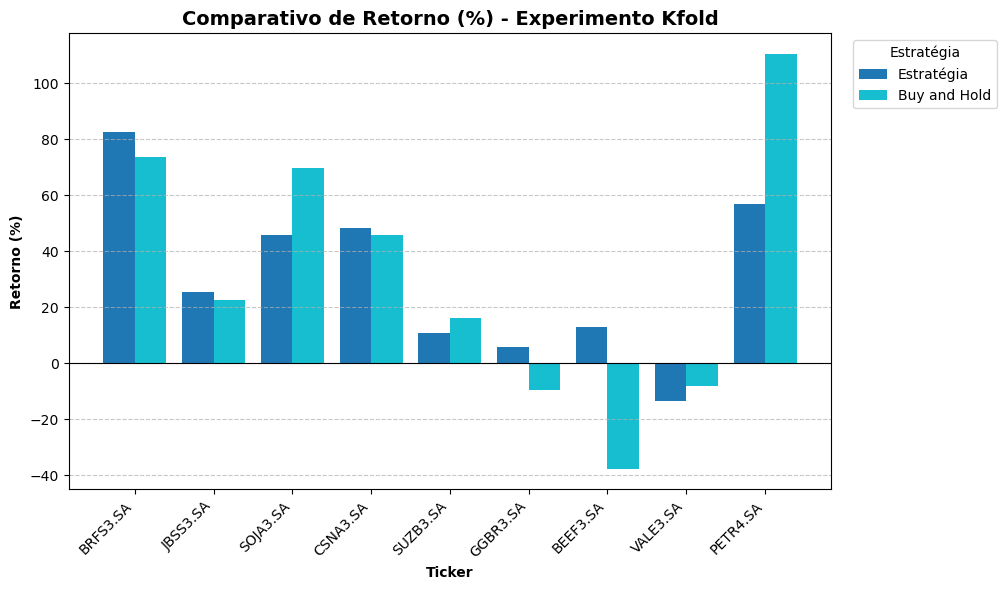

  Gerando gráfico para experimento: Macro


C:\Users\leona\AppData\Local\Temp\ipykernel_28052\2651651332.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_strategies)


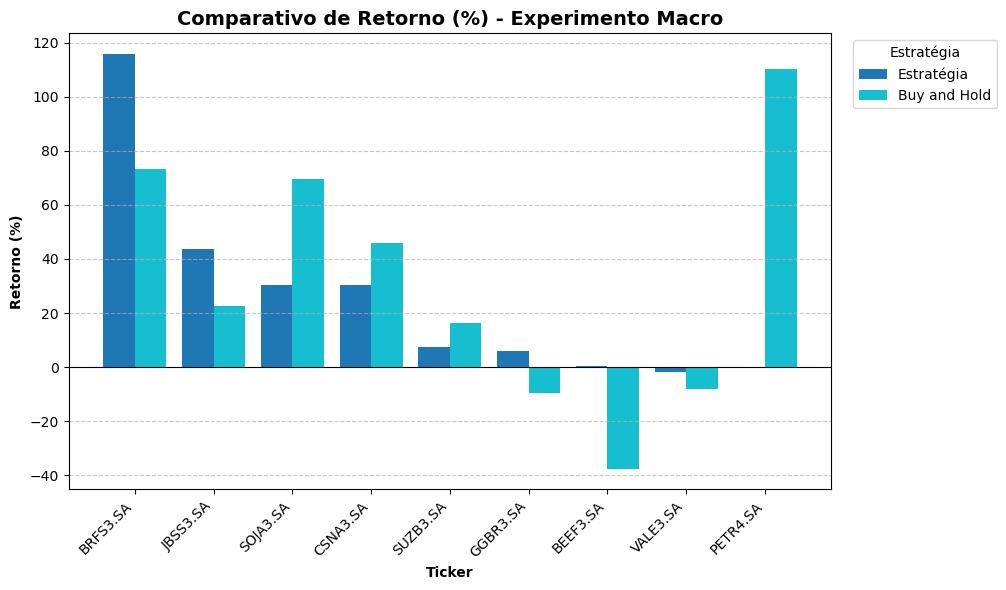

  Gerando gráfico para experimento: MacroMicro


C:\Users\leona\AppData\Local\Temp\ipykernel_28052\2651651332.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_strategies)


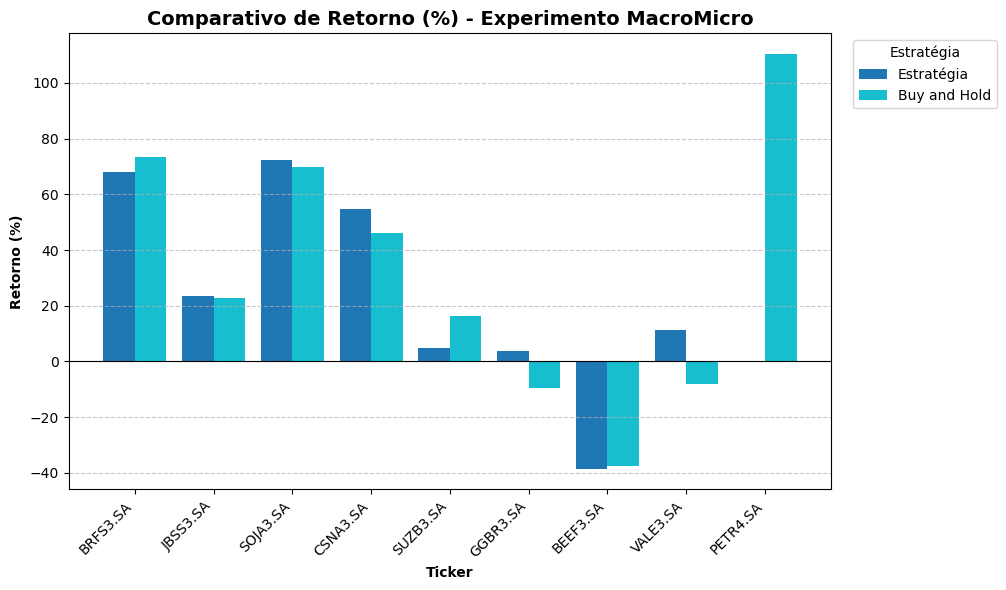

  Gerando gráfico para experimento: Micro


C:\Users\leona\AppData\Local\Temp\ipykernel_28052\2651651332.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_strategies)


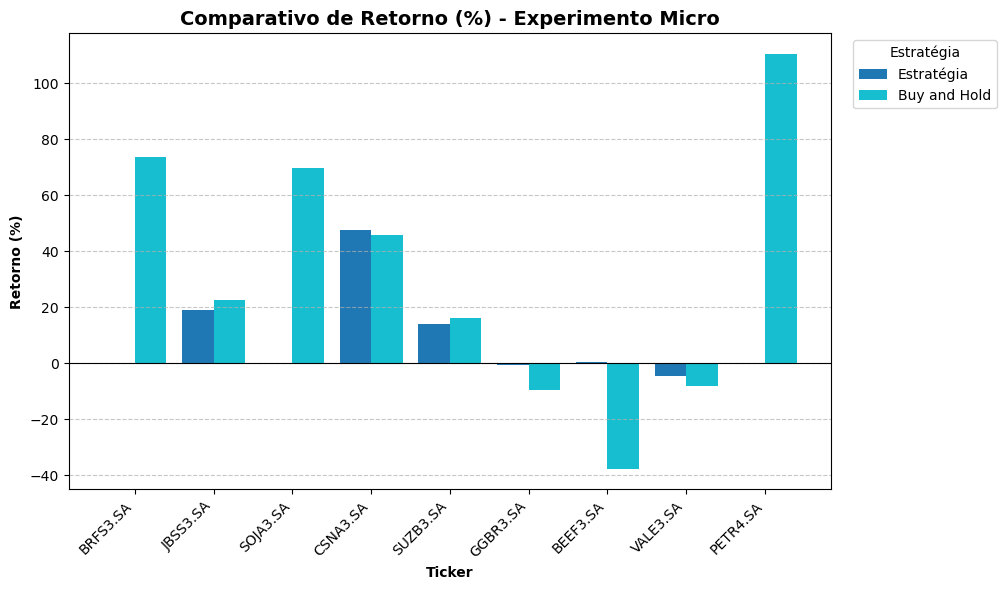

Geração dos gráficos finalizada.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuração ---
experimentos_teste_dir = r"c:\Users\leona\pyhtonscripts\ExperimentosTeste"
experimentos = ["Macro", "Micro", "MacroMicro", "Kfold"]
estrategias = {
    "Estratégia": "melhores_resultados.csv",
    "Buy and Hold": "melhores_resultados_buyhold.csv"
}

# --- Carregamento dos dados ---
dfs_to_merge = []

print("Carregando dados dos resultados...")

for exp in experimentos:
    exp_dir = os.path.join(experimentos_teste_dir, f"{exp}Resultados")
    if not os.path.exists(exp_dir):
        print(f"Warning: Diretório não encontrado para o experimento '{exp}': {exp_dir}")
        continue

    for nome_estrategia, nome_arquivo in estrategias.items():
        file_path = os.path.join(exp_dir, nome_arquivo)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                    col_name = f"Retorno_{exp}_{nome_estrategia}"
                    df_subset = df[['Ticker', 'Retorno (%)']].copy()
                    df_subset.rename(columns={'Retorno (%)': col_name}, inplace=True)
                    df_subset.set_index('Ticker', inplace=True)
                    dfs_to_merge.append(df_subset)
                    print(f"  Carregado: {exp} - {nome_estrategia}")
                else:
                    print(f"Warning: Faltando coluna 'Ticker' ou 'Retorno (%)' em {file_path}")
            except Exception as e:
                print(f"Erro ao carregar {file_path}: {e}")
        else:
            # Caso especial para Macro/Estratégia
            if nome_estrategia == "Estratégia" and exp == "Macro":
                alt_file_path = os.path.join(experimentos_teste_dir, "Macro", "melhores_resultados.csv")
                if os.path.exists(alt_file_path):
                    try:
                        df = pd.read_csv(alt_file_path)
                        if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                            col_name = f"Retorno_{exp}_{nome_estrategia}"
                            df_subset = df[['Ticker', 'Retorno (%)']].copy()
                            df_subset.rename(columns={'Retorno (%)': col_name}, inplace=True)
                            df_subset.set_index('Ticker', inplace=True)
                            dfs_to_merge.append(df_subset)
                            print(f"  Carregado: {exp} - {nome_estrategia} (de {alt_file_path})")
                        else:
                            print(f"Warning: Faltando coluna 'Ticker' ou 'Retorno (%)' em {alt_file_path}")
                    except Exception as e:
                        print(f"Erro ao carregar {alt_file_path}: {e}")
                else:
                    print(f"Warning: Arquivo não encontrado para {exp} - {nome_estrategia}: {file_path} e {alt_file_path}")
            else:
                print(f"Warning: Arquivo não encontrado para {exp} - {nome_estrategia}: {file_path}")

# --- Unir os dados ---
if not dfs_to_merge:
    print("\nErro: Nenhum dado carregado. Não é possível gerar gráfico.")
else:
    merged_df = pd.concat(dfs_to_merge, axis=1)
    merged_df.fillna(0, inplace=True)
    print("\nDados unidos com sucesso.")

    # --- Plotagem: um gráfico para cada experimento ---
    experiments_in_data = sorted(list(set([col.split('_')[1] for col in merged_df.columns])))

    for exp_type in experiments_in_data:
        print(f"  Gerando gráfico para experimento: {exp_type}")
        exp_cols = [col for col in merged_df.columns if col.split('_')[1] == exp_type]
        df_plot = merged_df[exp_cols]

        n_strategies = len(df_plot.columns)
        n_tickers = len(df_plot.index)
        if n_strategies == 0 or n_tickers == 0:
            print(f"    Pulando {exp_type} - Sem dados para plotar.")
            continue

        bar_width = 0.8 / n_strategies
        index = np.arange(n_tickers)

        fig, ax = plt.subplots(figsize=(12, 6))
        colors = plt.cm.get_cmap('tab10', n_strategies)

        for i, col in enumerate(df_plot.columns):
            strategy_name = '_'.join(col.split('_')[2:])
            bar_position = index + i * bar_width - (n_strategies * bar_width / 2) + bar_width / 2
            ax.bar(bar_position, df_plot[col], bar_width, label=strategy_name, color=colors(i))

        ax.set_xlabel('Ticker', fontweight='bold')
        ax.set_ylabel('Retorno (%)', fontweight='bold')
        ax.set_title(f'Comparativo de Retorno (%) - Experimento {exp_type}', fontweight='bold', fontsize=14)
        ax.set_xticks(index)
        ax.set_xticklabels(df_plot.index, rotation=45, ha="right")
        ax.legend(title="Estratégia", bbox_to_anchor=(1.02, 1), loc='upper left')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.axhline(0, color='black', linewidth=0.8)

        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

    print("Geração dos gráficos finalizada.")

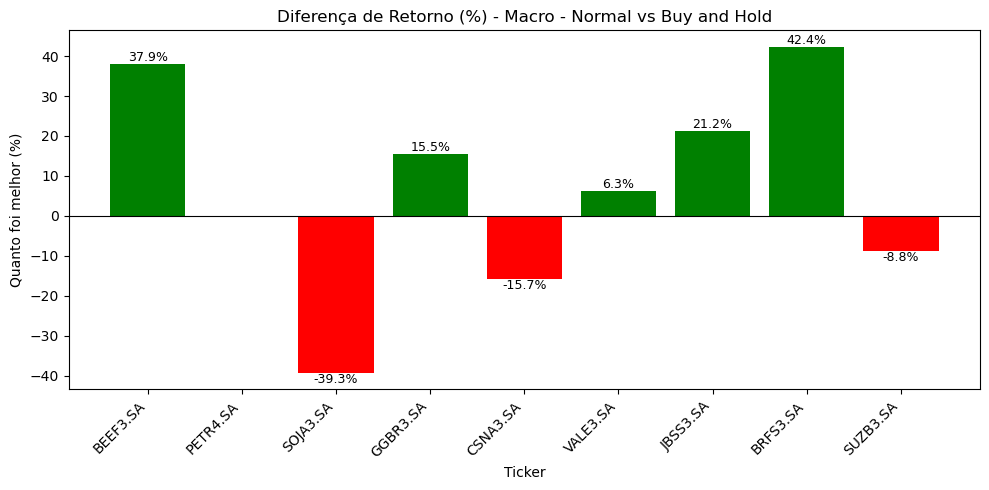


Macro - Normal vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA                0.315019           -37.628500      37.943519
PETR4.SA                     NaN           110.378876            NaN
SOJA3.SA               30.321634            69.663757     -39.342123
GGBR3.SA                5.847092            -9.637819      15.484911
CSNA3.SA               30.306581            45.968913     -15.662332
VALE3.SA               -1.889900            -8.185189       6.295288
JBSS3.SA               43.860416            22.662054      21.198362
BRFS3.SA              115.846061            73.492466      42.353595
SUZB3.SA                7.411404            16.233084      -8.821680


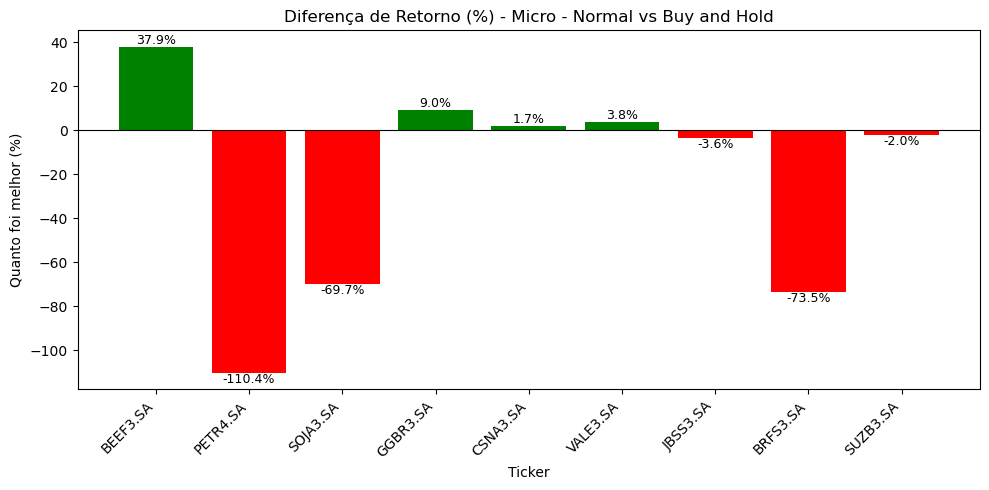


Micro - Normal vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA                0.293255           -37.628500      37.921754
PETR4.SA                0.000000           110.378876    -110.378876
SOJA3.SA                0.000000            69.663757     -69.663757
GGBR3.SA               -0.594903            -9.637819       9.042916
CSNA3.SA               47.674384            45.968913       1.705471
VALE3.SA               -4.355162            -8.185189       3.830027
JBSS3.SA               19.054348            22.662054      -3.607706
BRFS3.SA                0.000000            73.492466     -73.492466
SUZB3.SA               14.204549            16.233084      -2.028535


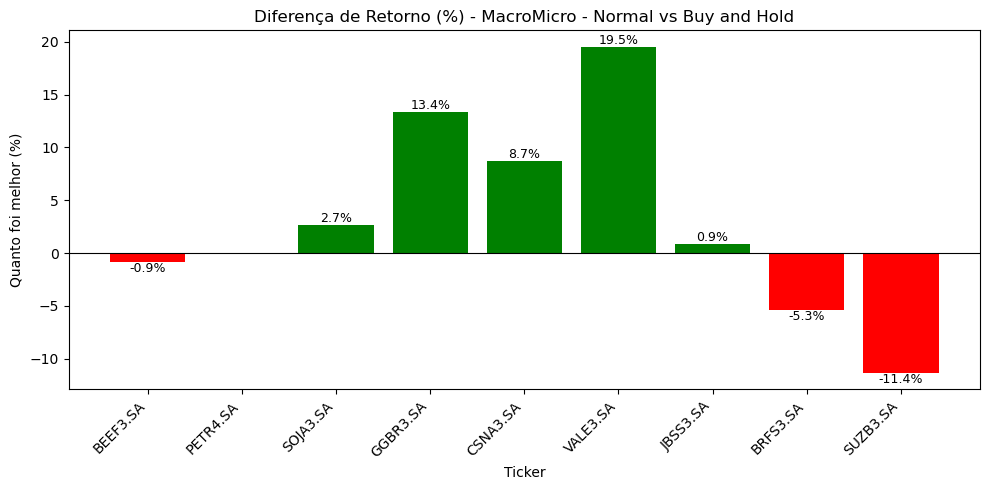


MacroMicro - Normal vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA              -38.503608           -37.628500      -0.875108
PETR4.SA                     NaN           110.378876            NaN
SOJA3.SA               72.330658            69.663757       2.666901
GGBR3.SA                3.765512            -9.637819      13.403331
CSNA3.SA               54.641895            45.968913       8.672982
VALE3.SA               11.356586            -8.185189      19.541775
JBSS3.SA               23.525868            22.662054       0.863814
BRFS3.SA               68.143267            73.492466      -5.349199
SUZB3.SA                4.874766            16.233084     -11.358318


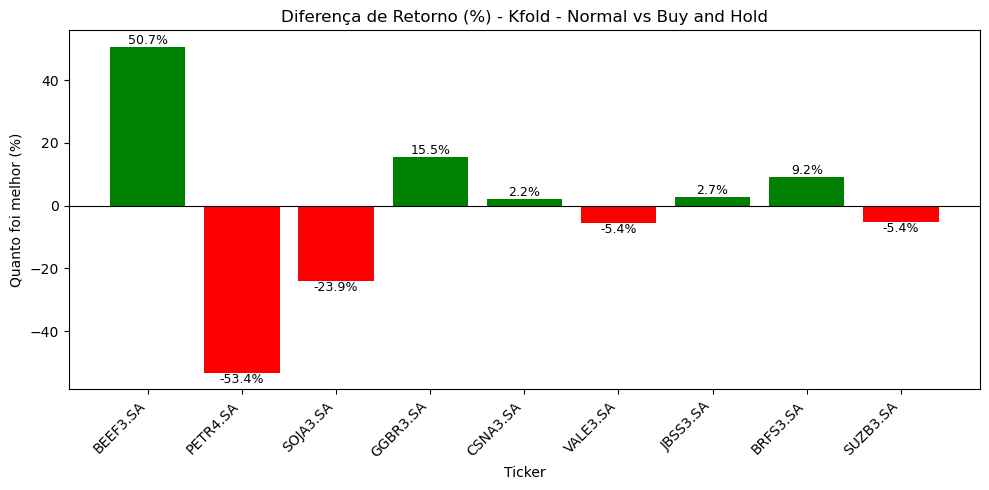


Kfold - Normal vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA               13.041388           -37.628500      50.669888
PETR4.SA               56.995396           110.378876     -53.383480
SOJA3.SA               45.806567            69.663757     -23.857190
GGBR3.SA                5.835491            -9.637819      15.473310
CSNA3.SA               48.164052            45.968913       2.195139
VALE3.SA              -13.617669            -8.185189      -5.432480
JBSS3.SA               25.350212            22.662054       2.688158
BRFS3.SA               82.671956            73.492466       9.179490
SUZB3.SA               10.870330            16.233084      -5.362754


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuração ---
experimentos_teste_dir = r"c:\\Users\\leona\\pyhtonscripts\\ExperimentosTeste"
experimentos = ["Macro", "Micro", "MacroMicro", "Kfold"]
estrategias = {
    "Normal": "melhores_resultados.csv",
    "Buy and Hold": "melhores_resultados_buyhold.csv"
}

# Defina a lista de tickers que você quer manter sempre na mesma ordem
TICKERS_PADRAO = [
    "BEEF3.SA", "PETR4.SA", "SOJA3.SA", "GGBR3.SA", "CSNA3.SA",
    "VALE3.SA", "JBSS3.SA", "BRFS3.SA", "SUZB3.SA"
]

# --- Carregamento dos dados ---
dfs = {}
for exp in experimentos:
    exp_dir = os.path.join(experimentos_teste_dir, f"{exp}Resultados")
    for nome_estrategia, nome_arquivo in estrategias.items():
        file_path = os.path.join(exp_dir, nome_arquivo)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                key = (exp, nome_estrategia)
                df = df[['Ticker', 'Retorno (%)']].set_index('Ticker')
                # Reindexa para garantir a ordem e presença dos tickers
                df = df.reindex(TICKERS_PADRAO)
                dfs[key] = df
        elif nome_estrategia == "Normal" and exp == "Macro":
            alt_file_path = os.path.join(experimentos_teste_dir, "Macro", "melhores_resultados.csv")
            if os.path.exists(alt_file_path):
                df = pd.read_csv(alt_file_path)
                if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                    key = (exp, nome_estrategia)
                    df = df[['Ticker', 'Retorno (%)']].set_index('Ticker')
                    df = df.reindex(TICKERS_PADRAO)
                    dfs[key] = df

# --- Comparação com Buy and Hold ---
for exp in experimentos:
    bh = dfs.get((exp, "Buy and Hold"))
    if bh is None:
        print(f"Sem Buy and Hold para {exp}")
        continue

    for nome_estrategia in ["Normal", "Direção", "Média Móvel"]:
        df = dfs.get((exp, nome_estrategia))
        if df is None:
            continue

        # Junta os retornos e mantém a ordem dos tickers
        comp = df.join(bh, lsuffix='_estrategia', rsuffix='_buyhold', how='outer')
        comp['Diferença (%)'] = comp['Retorno (%)_estrategia'] - comp['Retorno (%)_buyhold']

        # Garante a ordem dos tickers
        comp = comp.reindex(TICKERS_PADRAO)

        # Plot
        plt.figure(figsize=(10, 5))
        bars = plt.bar(comp.index, comp['Diferença (%)'], color=['green' if (not np.isnan(x) and x > 0) else 'red' for x in comp['Diferença (%)']])
        plt.axhline(0, color='black', linewidth=0.8)
        plt.title(f'Diferença de Retorno (%) - {exp} - {nome_estrategia} vs Buy and Hold')
        plt.ylabel('Quanto foi melhor (%)')
        plt.xlabel('Ticker')
        plt.xticks(rotation=45, ha='right')
        for bar, yval in zip(bars, comp['Diferença (%)']):
            if not np.isnan(yval):
                plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom' if yval>=0 else 'top', fontsize=9)
        plt.tight_layout()
        plt.show()

        # Exibe tabela para referência
        print(f"\n{exp} - {nome_estrategia} vs Buy and Hold:")
        print(comp[['Retorno (%)_estrategia', 'Retorno (%)_buyhold', 'Diferença (%)']])

In [34]:
# --- Geração de Tabelas Comparativas (Estratégia vs Buy and Hold) ---
import pandas as pd
import numpy as np
# Certifique-se de que matplotlib está importado se ainda não estiver
# import matplotlib.pyplot as plt

# Certifique-se de que merged_df existe e foi calculado na primeira célula
if 'merged_df' in locals():
    # Defina a lista de tickers padrão para garantir a ordem
    TICKERS_PADRAO = [
        "BEEF3.SA", "SOJA3.SA", "GGBR3.SA", "CSNA3.SA", # Adicionado PETR4.SA para consistência
        "VALE3.SA", "JBSS3.SA", "BRFS3.SA", "SUZB3.SA"
    ]

    # Defina um valor de investimento inicial para calcular o ganho (ex: R$ 10000)
    investimento_inicial = 10000

    # Itera sobre cada tipo de experimento presente nos dados
    experimentos_nos_dados = sorted(list(set([col.split('_')[1] for col in merged_df.columns])))

    # Mapeamento de nomes de experimento para exibição
    nomes_experimento_display = {
        "Kfold": "Preço Anterior",
        # Adicione outros mapeamentos se necessário
    }


    for exp in experimentos_nos_dados:
        # Usar os nomes das colunas como definidos na primeira célula
        col_estrategia = f"Retorno_{exp}_Estratégia"
        col_bh = f"Retorno_{exp}_Buy and Hold"

        # Verifica se temos dados para ambas as estratégias neste experimento
        if col_estrategia in merged_df.columns and col_bh in merged_df.columns:

            # Define o nome a ser exibido no título
            display_exp_name = nomes_experimento_display.get(exp, exp) # Usa o nome mapeado ou o original
            print(f"\n--- Tabela Comparativa: Experimento {display_exp_name} ---")

            # Seleciona as colunas relevantes
            df_comp = merged_df[[col_estrategia, col_bh]].copy()

            # Renomeia as colunas para clareza
            df_comp.rename(columns={
                col_estrategia: 'Retorno Estratégia (%)',
                col_bh: 'Retorno B&H (%)'
            }, inplace=True)

            # Garante a ordem dos tickers e preenche ausentes com NaN ANTES dos cálculos
            df_comp = df_comp.reindex(TICKERS_PADRAO)

            # Preenche NaNs com 0 ANTES de calcular diferença e ganhos
            df_comp.fillna(0, inplace=True)

            # Calcula a diferença de retorno
            df_comp['Diferença (%)'] = df_comp['Retorno Estratégia (%)'] - df_comp['Retorno B&H (%)']

            # Calcula o ganho financeiro baseado no investimento inicial
            df_comp['Ganho Estratégia (R$)'] = investimento_inicial * (df_comp['Retorno Estratégia (%)'] / 100)
            df_comp['Ganho B&H (R$)'] = investimento_inicial * (df_comp['Retorno B&H (%)'] / 100)

            # Reordena colunas para melhor visualização
            df_comp = df_comp[[
                'Retorno Estratégia (%)',
                'Retorno B&H (%)',
                'Diferença (%)',
                'Ganho Estratégia (R$)',
                'Ganho B&H (R$)'
            ]]

            # --- Adicionar Linha de Total ---
            total_row = df_comp.sum(numeric_only=True)
            total_row.name = 'Total'
            df_comp = pd.concat([df_comp, pd.DataFrame([total_row])])
            # --- Fim da Adição da Linha de Total ---

            # --- Formatação e Estilização ---
            format_dict = {
                'Retorno Estratégia (%)': '{:.2f}%',
                'Retorno B&H (%)': '{:.2f}%',
                'Diferença (%)': '{:+.2f}%',
                'Ganho Estratégia (R$)': 'R$ {:,.2f}',
                'Ganho B&H (R$)': 'R$ {:,.2f}'
            }

            # Colunas para aplicar gradiente de cor
            cols_gradient_retorno = ['Retorno Estratégia (%)', 'Retorno B&H (%)']
            cols_gradient_ganho = ['Ganho Estratégia (R$)', 'Ganho B&H (R$)']
            col_diff = 'Diferença (%)'

            # Aplica formatação e estilos usando Styler
            styled_df = (df_comp.style
                         # Aplica gradiente de cor (verde para positivo, vermelho para negativo) nos retornos
                         .background_gradient(cmap='RdYlGn', subset=pd.IndexSlice[df_comp.index[:-1], cols_gradient_retorno], axis=None)
                         # Aplica gradiente de cor (azul claro para baixo, azul escuro para alto) nos ganhos
                         .background_gradient(cmap='Blues', subset=pd.IndexSlice[df_comp.index[:-1], cols_gradient_ganho], axis=None)
                         # Aplica gradiente de cor na diferença (verde para positivo, vermelho para negativo)
                         .background_gradient(cmap='RdYlGn', subset=pd.IndexSlice[df_comp.index[:-1], col_diff], axis=None)
                         # Destaca o maior ganho da estratégia
                         .highlight_max(subset=pd.IndexSlice[df_comp.index[:-1], 'Ganho Estratégia (R$)'], color='lightgreen')
                         # Destaca a maior diferença positiva
                         .highlight_max(subset=pd.IndexSlice[df_comp.index[:-1], 'Diferença (%)'], color='lightgreen')
                         # Destaca a menor diferença (mais negativa)
                         .highlight_min(subset=pd.IndexSlice[df_comp.index[:-1], 'Diferença (%)'], color='salmon')
                         # Aplica a formatação numérica definida no dicionário
                         .format(format_dict, na_rep="-")
                         # Adiciona uma legenda à tabela
                         .set_caption(f"Comparativo: Estratégia vs Buy and Hold ({display_exp_name})")
                         # Melhora a aparência das bordas
                         .set_properties(**{'border': '1px solid black', 'text-align': 'center'})
                        )

            display(styled_df)

        else:
            # Mensagem de erro caso faltem colunas
            display_exp_name = nomes_experimento_display.get(exp, exp) # Garante nome correto na msg de erro
            print(f"\n--- Experimento {display_exp_name}: Dados insuficientes para comparação ---")
            if col_estrategia not in merged_df.columns:
                print(f"    Coluna '{col_estrategia}' não encontrada.")
            if col_bh not in merged_df.columns:
                print(f"    Coluna '{col_bh}' não encontrada.")

else:
    print("Erro: O DataFrame 'merged_df' não foi encontrado. Execute a primeira célula primeiro.")



--- Tabela Comparativa: Experimento Preço Anterior ---


,Retorno Estratégia (%),Retorno B&H (%),Diferença (%),Ganho Estratégia (R$),Ganho B&H (R$)
BEEF3.SA,13.04%,-37.63%,+50.67%,"R$ 1,304.14","R$ -3,762.85"
SOJA3.SA,45.81%,69.66%,-23.86%,"R$ 4,580.66","R$ 6,966.38"
GGBR3.SA,5.84%,-9.64%,+15.47%,R$ 583.55,R$ -963.78
CSNA3.SA,48.16%,45.97%,+2.20%,"R$ 4,816.41","R$ 4,596.89"
VALE3.SA,-13.62%,-8.19%,-5.43%,"R$ -1,361.77",R$ -818.52
JBSS3.SA,25.35%,22.66%,+2.69%,"R$ 2,535.02","R$ 2,266.21"
BRFS3.SA,82.67%,73.49%,+9.18%,"R$ 8,267.20","R$ 7,349.25"
SUZB3.SA,10.87%,16.23%,-5.36%,"R$ 1,087.03","R$ 1,623.31"
Total,218.12%,172.57%,+45.55%,"R$ 21,812.23","R$ 17,256.88"



--- Tabela Comparativa: Experimento Macro ---


,Retorno Estratégia (%),Retorno B&H (%),Diferença (%),Ganho Estratégia (R$),Ganho B&H (R$)
BEEF3.SA,0.32%,-37.63%,+37.94%,R$ 31.50,"R$ -3,762.85"
SOJA3.SA,30.32%,69.66%,-39.34%,"R$ 3,032.16","R$ 6,966.38"
GGBR3.SA,5.85%,-9.64%,+15.48%,R$ 584.71,R$ -963.78
CSNA3.SA,30.31%,45.97%,-15.66%,"R$ 3,030.66","R$ 4,596.89"
VALE3.SA,-1.89%,-8.19%,+6.30%,R$ -188.99,R$ -818.52
JBSS3.SA,43.86%,22.66%,+21.20%,"R$ 4,386.04","R$ 2,266.21"
BRFS3.SA,115.85%,73.49%,+42.35%,"R$ 11,584.61","R$ 7,349.25"
SUZB3.SA,7.41%,16.23%,-8.82%,R$ 741.14,"R$ 1,623.31"
Total,232.02%,172.57%,+59.45%,"R$ 23,201.83","R$ 17,256.88"



--- Tabela Comparativa: Experimento MacroMicro ---


,Retorno Estratégia (%),Retorno B&H (%),Diferença (%),Ganho Estratégia (R$),Ganho B&H (R$)
BEEF3.SA,-38.50%,-37.63%,-0.88%,"R$ -3,850.36","R$ -3,762.85"
SOJA3.SA,72.33%,69.66%,+2.67%,"R$ 7,233.07","R$ 6,966.38"
GGBR3.SA,3.77%,-9.64%,+13.40%,R$ 376.55,R$ -963.78
CSNA3.SA,54.64%,45.97%,+8.67%,"R$ 5,464.19","R$ 4,596.89"
VALE3.SA,11.36%,-8.19%,+19.54%,"R$ 1,135.66",R$ -818.52
JBSS3.SA,23.53%,22.66%,+0.86%,"R$ 2,352.59","R$ 2,266.21"
BRFS3.SA,68.14%,73.49%,-5.35%,"R$ 6,814.33","R$ 7,349.25"
SUZB3.SA,4.87%,16.23%,-11.36%,R$ 487.48,"R$ 1,623.31"
Total,200.13%,172.57%,+27.57%,"R$ 20,013.49","R$ 17,256.88"



--- Tabela Comparativa: Experimento Micro ---


,Retorno Estratégia (%),Retorno B&H (%),Diferença (%),Ganho Estratégia (R$),Ganho B&H (R$)
BEEF3.SA,0.29%,-37.63%,+37.92%,R$ 29.33,"R$ -3,762.85"
SOJA3.SA,0.00%,69.66%,-69.66%,R$ 0.00,"R$ 6,966.38"
GGBR3.SA,-0.59%,-9.64%,+9.04%,R$ -59.49,R$ -963.78
CSNA3.SA,47.67%,45.97%,+1.71%,"R$ 4,767.44","R$ 4,596.89"
VALE3.SA,-4.36%,-8.19%,+3.83%,R$ -435.52,R$ -818.52
JBSS3.SA,19.05%,22.66%,-3.61%,"R$ 1,905.43","R$ 2,266.21"
BRFS3.SA,0.00%,73.49%,-73.49%,R$ 0.00,"R$ 7,349.25"
SUZB3.SA,14.20%,16.23%,-2.03%,"R$ 1,420.45","R$ 1,623.31"
Total,76.28%,172.57%,-96.29%,"R$ 7,627.65","R$ 17,256.88"



--- Gerando Gráfico Comparativo Final entre Experimentos ---


C:\Users\leona\AppData\Local\Temp\ipykernel_28052\3918081914.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', n_strategies)


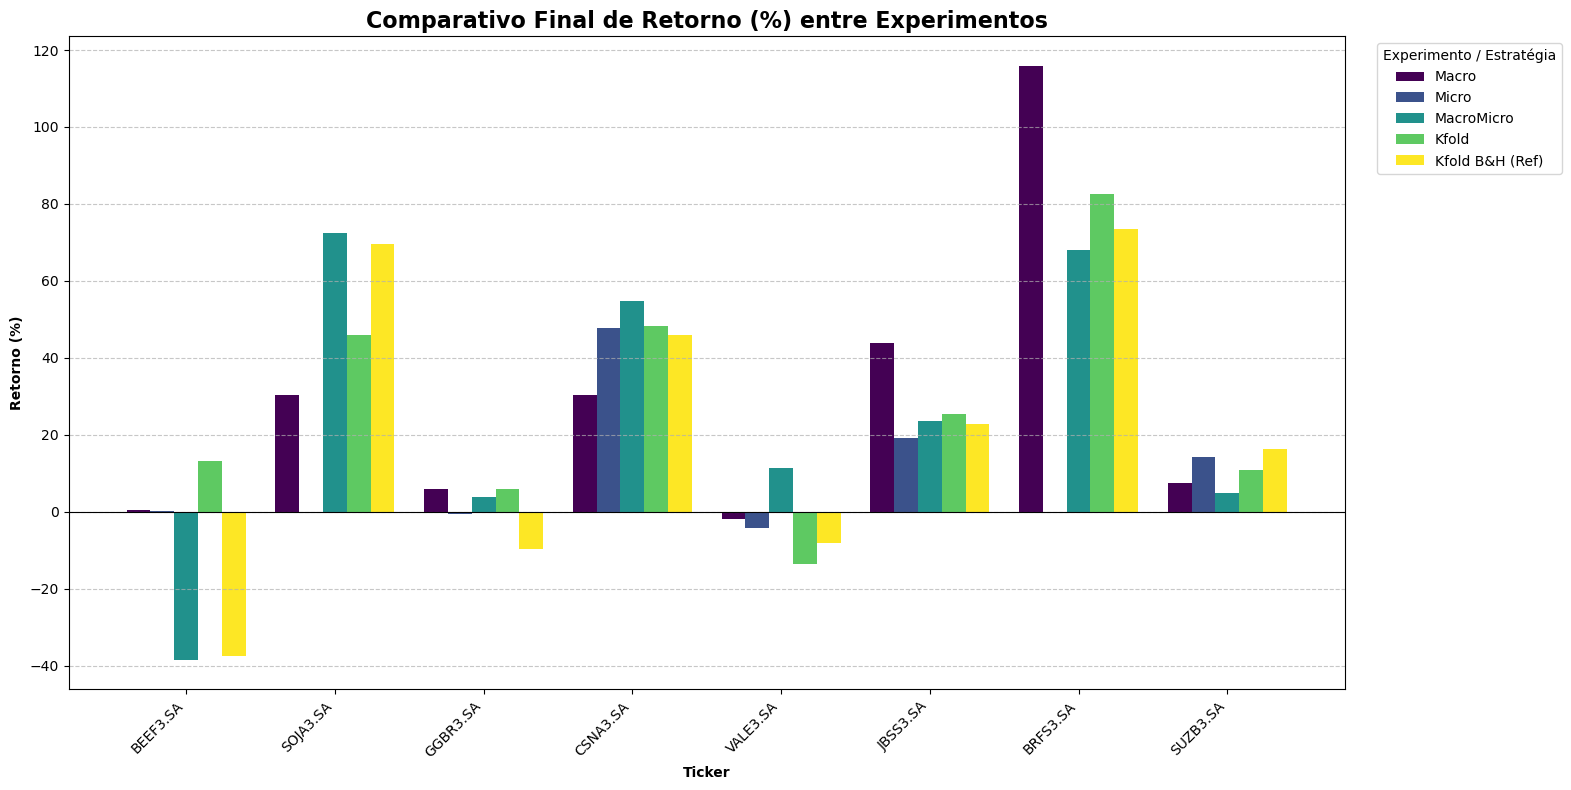

--- Geração do Gráfico Comparativo Final Concluída ---


In [35]:
# --- Célula Nova: Gráfico Comparativo Final ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Certifique-se de que merged_df existe e foi calculado na primeira célula
if 'merged_df' in locals():
    print("\n--- Gerando Gráfico Comparativo Final entre Experimentos ---")

    # Selecionar colunas de retorno das estratégias principais e uma de Buy and Hold para referência
    cols_estrategia = [col for col in merged_df.columns if col.endswith('_Estratégia')]
    # Adicionar uma coluna Buy and Hold como referência (ex: Kfold)
    cols_bh_ref = [col for col in merged_df.columns if col == 'Retorno_Kfold_Buy and Hold'] # Ou outra referência B&H

    cols_to_plot = cols_estrategia + cols_bh_ref

    # Filtrar o DataFrame para incluir apenas as colunas selecionadas
    df_final_plot = merged_df[cols_to_plot].copy()

    # Renomear colunas para clareza no gráfico
    rename_map = {col: col.replace('Retorno_', '').replace('_Estratégia', '').replace('_Buy and Hold', ' B&H (Ref)') for col in df_final_plot.columns}
    df_final_plot.rename(columns=rename_map, inplace=True)

    # Garantir a ordem dos tickers (se TICKERS_PADRAO foi definido)
    if 'TICKERS_PADRAO' in locals():
         # Certifique-se que TICKERS_PADRAO contém apenas tickers presentes no índice
         tickers_validos = [ticker for ticker in TICKERS_PADRAO if ticker in df_final_plot.index]
         df_final_plot = df_final_plot.reindex(tickers_validos)


    n_strategies = len(df_final_plot.columns)
    n_tickers = len(df_final_plot.index)

    if n_strategies == 0 or n_tickers == 0:
        print("Erro: Sem dados suficientes para gerar o gráfico comparativo final.")
    else:
        bar_width = 0.8 / n_strategies
        index = np.arange(n_tickers)

        fig, ax = plt.subplots(figsize=(18, 8)) # Ajustar tamanho conforme necessário
        # Usar um colormap diferente ou definir cores manualmente se desejar
        colors = plt.cm.get_cmap('viridis', n_strategies)

        for i, col in enumerate(df_final_plot.columns):
            bar_position = index + i * bar_width - (n_strategies * bar_width / 2) + bar_width / 2
            ax.bar(bar_position, df_final_plot[col], bar_width, label=col, color=colors(i))

        ax.set_xlabel('Ticker', fontweight='bold')
        ax.set_ylabel('Retorno (%)', fontweight='bold')
        ax.set_title('Comparativo Final de Retorno (%) entre Experimentos', fontweight='bold', fontsize=16)
        ax.set_xticks(index)
        ax.set_xticklabels(df_final_plot.index, rotation=45, ha="right")
        ax.legend(title="Experimento / Estratégia", bbox_to_anchor=(1.02, 1), loc='upper left')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.axhline(0, color='black', linewidth=0.8) # Linha zero

        plt.tight_layout(rect=[0, 0, 0.88, 1]) # Ajustar rect para acomodar a legenda
        plt.show()
        print("--- Geração do Gráfico Comparativo Final Concluída ---")

else:
    print("Erro: O DataFrame 'merged_df' não foi encontrado. Execute a primeira célula primeiro.")
